In [133]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [64]:
credit_df = pd.read_csv("german_credit.csv")
credit_df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [65]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [67]:
from sklearn.model_selection import train_test_split
X1,X2 = train_test_split(credit_df,test_size=0.5,random_state=1)

In [6]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [68]:
# Print Shape of model data
X1.shape

(500, 21)

In [69]:
X1.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [70]:
credit_df_dummy = pd.get_dummies(X1)
credit_df_dummy.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

### Check for highly correlated variables but don't required any treatment for this use case

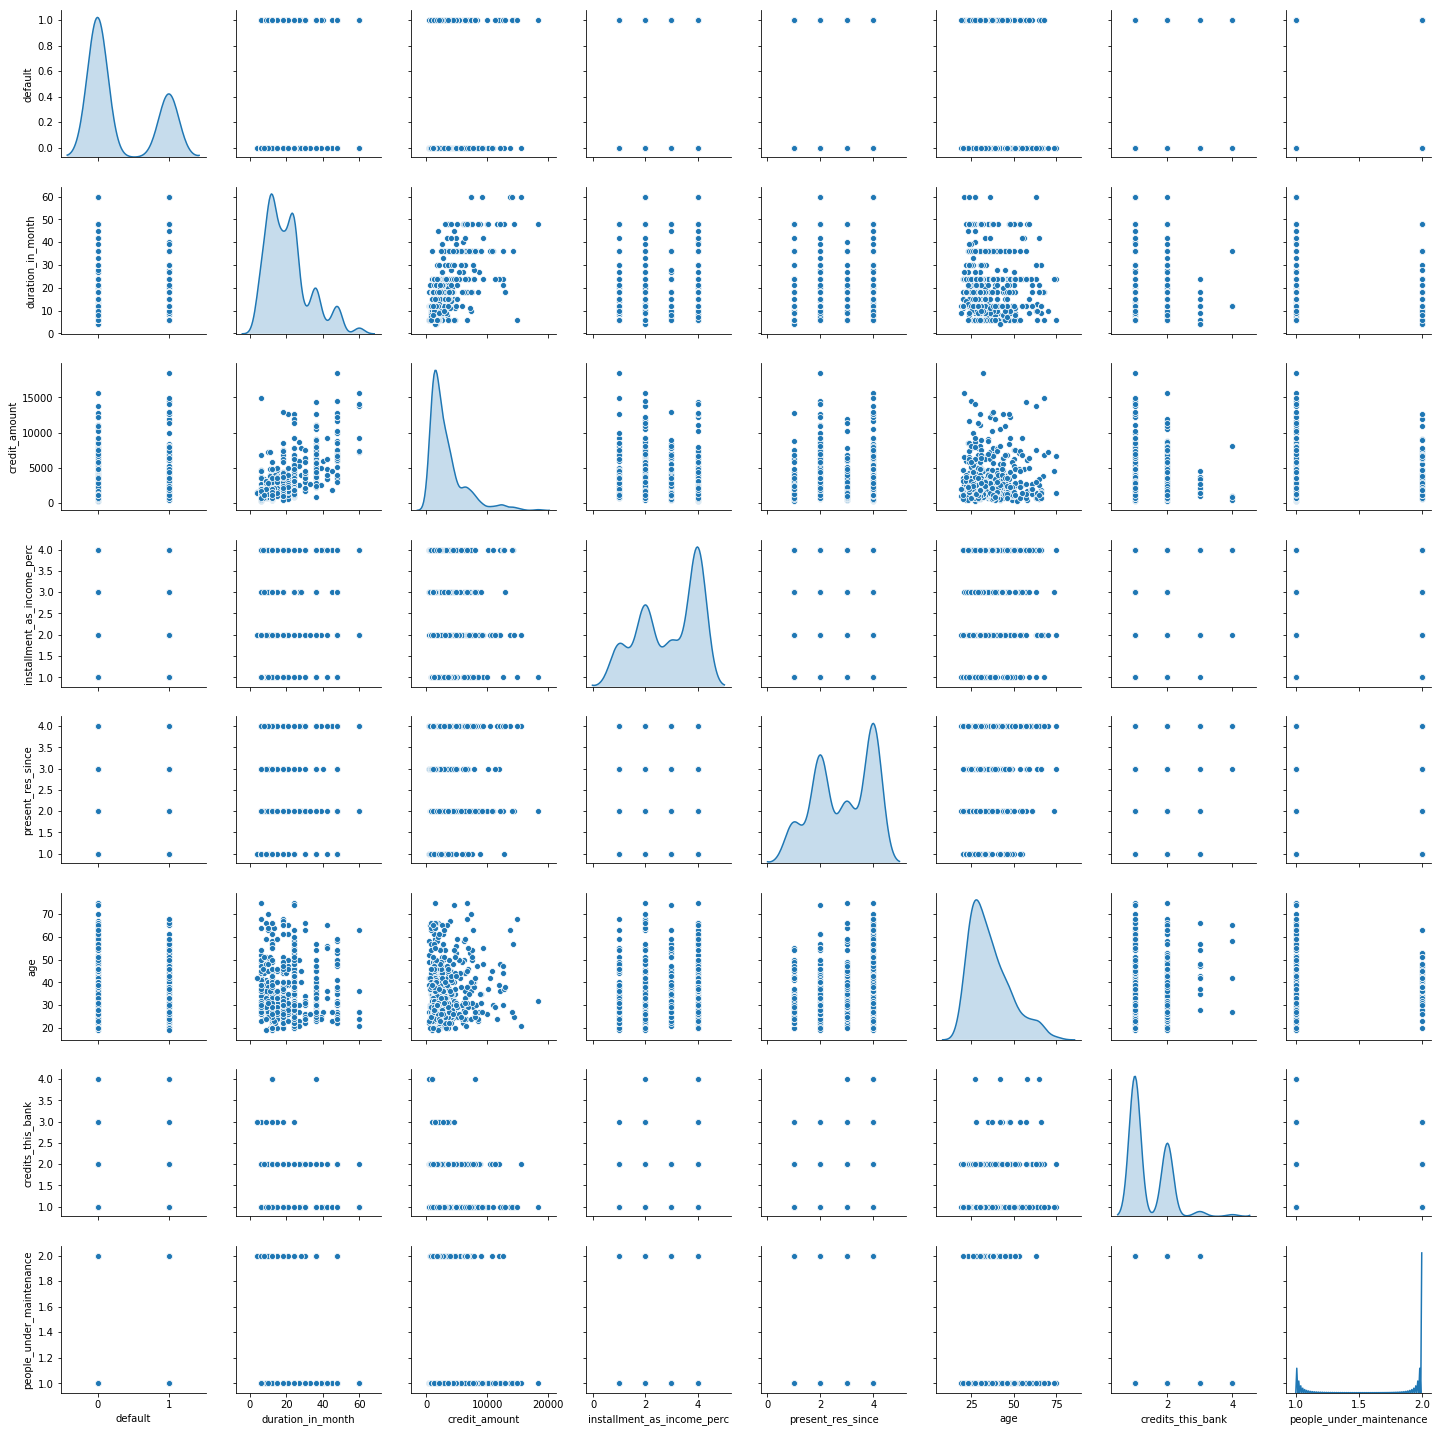

In [126]:
sns.pairplot(X1,diag_kind="kde")

In [71]:
X1.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.154395,0.102781,0.130897,-0.004657,-0.135853,-0.047948,0.005908
duration_in_month,0.154395,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544
credit_amount,0.102781,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018
installment_as_income_perc,0.130897,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701
present_res_since,-0.004657,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483
age,-0.135853,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632
credits_this_bank,-0.047948,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729
people_under_maintenance,0.005908,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000


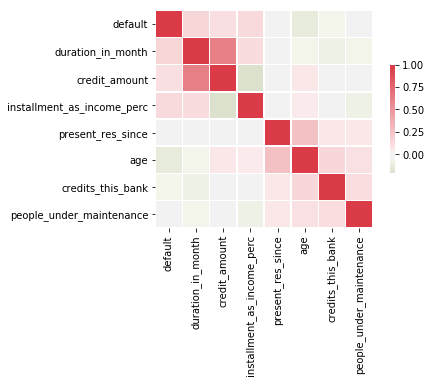

In [72]:
cmap = sns.diverging_palette(100, 10, as_cmap=True)
sns.heatmap(X1.corr(), cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Drop the original variables which are converted to dummy

In [73]:
#get_dummies function already drops by default the original columns and replaces with the new ones.
#So we do not need to drop the original columnns explicitly.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [74]:
X= credit_df_dummy.drop("default",axis=1)
y= credit_df_dummy.pop("default")

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=1)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (150, 61)
X_test shape: (350, 61)
y_train shape: (150,)
y_test shape: (350,)


In [76]:
X_train.dtypes

duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_0 <= ... < 200 DM                                        uint8
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_all credits at this bank paid back duly                      

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [93]:
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [94]:
y_pred= rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [95]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
print('Confusion Matrix:\n\n',confusion_matrix(y_test,y_pred))
print('\nAccuracy Score:',accuracy_score(y_test,y_pred)*100,'%')
print('\nClassification Report:\n\n',classification_report(y_test,y_pred))

Confusion Matrix:

 [[221  20]
 [ 76  33]]

Accuracy Score: 72.57142857142857 %

Classification Report:

              precision    recall  f1-score   support

          0       0.74      0.92      0.82       241
          1       0.62      0.30      0.41       109

avg / total       0.71      0.73      0.69       350



### Q6 Show the list of the features importance( 1 Marks)

In [96]:
rfcl.feature_importances_

array([5.94626769e-02, 9.15999020e-02, 6.03428192e-02, 3.80930081e-02,
       8.41143742e-02, 1.88114099e-02, 1.15858638e-02, 1.50791938e-02,
       2.46523109e-02, 5.67763980e-03, 2.99868218e-02, 3.64594365e-03,
       1.90303373e-02, 7.30072601e-03, 1.68498626e-02, 6.09712115e-03,
       3.84539685e-03, 7.38166102e-03, 3.95520597e-02, 8.73422576e-03,
       1.26270676e-02, 7.95937152e-03, 2.16201485e-03, 9.99085287e-03,
       3.23562217e-05, 2.19426423e-03, 4.42250970e-03, 1.56377713e-02,
       1.26991399e-02, 5.50528115e-03, 9.55295692e-03, 1.37085895e-02,
       2.95482974e-02, 1.38130064e-02, 1.15996431e-02, 6.65940662e-03,
       1.80889642e-02, 2.52596713e-03, 8.43786056e-03, 1.52511434e-02,
       6.20072608e-03, 3.80299602e-03, 8.09826493e-03, 1.36765381e-02,
       1.26076919e-02, 2.19475116e-02, 1.97960172e-02, 1.42248114e-02,
       1.84017415e-02, 7.64353316e-03, 1.53900636e-02, 1.15163650e-02,
       9.69330438e-03, 1.12173000e-02, 1.54790176e-02, 9.68319705e-04,
      

In [97]:
pd.DataFrame(rfcl.feature_importances_,
             index = X_train.columns,
             columns=['importance']).sort_values('importance',ascending=False)

,importance
credit_amount,0.091600
age,0.084114
installment_as_income_perc,0.060343
duration_in_month,0.059463
purpose_car (new),0.039552
present_res_since,0.038093
account_check_status_no checking account,0.029987
present_emp_since_... < 1 year,0.029548
account_check_status_< 0 DM,0.024652
property_real estate,0.021948


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict

In [99]:
# Use below values
num_folds = 10
seed = 77

In [100]:
#Validate the Random Forest model build above using k fold

In [102]:
kfold= KFold(n_splits=num_folds,random_state = seed)

results = cross_val_score(rfcl, X_test, y_test, cv=kfold)

In [103]:
#Calculate Mean score

In [104]:
results.mean()

0.7542857142857142

In [105]:
# Calculate score standard deviation using std()

In [106]:
results.std()

0.058832172234211416

# Q8 Print the confusion matrix( 1 Marks)

In [107]:
y_pred_kf = cross_val_predict(rfcl, X_test, y_test, cv=kfold)

In [108]:
print('Confusion Matrix:\n\n',confusion_matrix(y_test,y_pred_kf))

Confusion Matrix:

 [[220  21]
 [ 65  44]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [109]:
from sklearn.metrics import precision_score,recall_score
print("Predicting Defaulter as Defaulter is ",precision_score(y_test,y_pred_kf)*100,'%')
print("Predicting Non-Defaulter as Non-Defaulter is ",recall_score(y_test,y_pred_kf)*100,'%')

Predicting Defaulter as Defaulter is  67.6923076923077 %
Predicting Non-Defaulter as Non-Defaulter is  40.36697247706422 %


In [110]:
print('Classification Accuracy:',accuracy_score(y_test,y_pred_kf)*100,'%')

Classification Accuracy: 75.42857142857143 %


In [111]:
print('Classification Report:\n\n',classification_report(y_test,y_pred_kf))

Classification Report:

              precision    recall  f1-score   support

          0       0.77      0.91      0.84       241
          1       0.68      0.40      0.51       109

avg / total       0.74      0.75      0.73       350



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [10]:
#Hint: Use roc_curve

In [112]:
## Predicting Probabilities
X_test["prob"] = rfcl.predict(X_test)

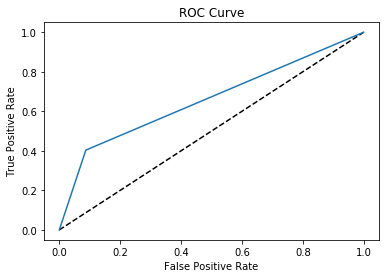

0.3165327953100613

In [134]:
#Roc_Curve and KS
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_kf)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

KS = (tpr - fpr).max()
KS

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [135]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred_kf)
auc

0.6582663976550306

### Optional (considering the 50% unused data for testing)

In [115]:
X2_test = pd.get_dummies(X2)

In [117]:
X_test_1 = X2_test.drop("default",axis=1)
y_test_1 = X2_test.pop("default")

In [118]:
## Predicting Probabilities
X_test_1["prob"] = rfcl.predict(X_test_1)

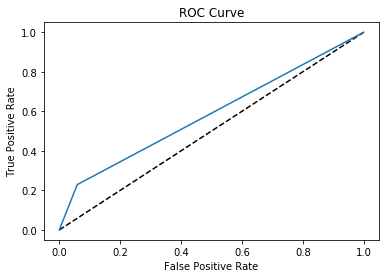

0.17017790262172283

In [119]:
#Roc_Curve and KS
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_1,X_test_1["prob"] )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

KS = (tpr - fpr).max()
KS

In [120]:
auc = roc_auc_score(y_random_test,credit_df_test["prob"])
auc

0.5850889513108615

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [13]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []